In [65]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

from scipy.io import arff

In [32]:
data = arff.loadarff('Autism-Child-Data.arff')
df = pd.DataFrame(data[0])

In [33]:
#df.head()

In [34]:
#df.info()

#### Description of features

- A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

- age - Age of the patient in years

- gender - Gender of the patient

- ethnicity - Ethnicity of the patient

- jaundice - Whether the patient had jaundice at the time of birth

- autism - Whether an immediate family member has been diagnosed with autism

- contry_of_res - Country of residence of the patient

- used_app_before - Whether the patient has undergone a screening test before

- result - Score for AQ1-10 screening test

- age_desc - Age of the patient

- relation - Relation of patient who completed the test

- Class/ASD - Classified result as NO or YES

In [35]:
catCols = [col for col in df.columns if df[col].dtype=="O"]
#catCols[:5]

In [36]:
df[catCols]=df[catCols].apply(lambda x: x.str.decode('utf8'))
#df.head()

In [37]:
#Making categorical variables numeric
df['ethnicity'].replace(['Middle Eastern ', 'White-European', 'Black',
       'South Asian', 'Asian', 'Pasifika', 'Hispanic', 'Turkish',
       'Latino','Others', '?'], [1,2,3,4,5,6,7,8,9,10,11], inplace=True)
df['gender'].replace(['m','f'],[0,1], inplace=True)
df['jundice'].replace(['no','yes'],[0,1], inplace=True)
df['austim'].replace(['no','yes'],[0,1], inplace=True)
df['Class/ASD'].replace(['NO','YES'],[0,1], inplace=True)

In [38]:
#drop missing values
df=df.dropna()

In [39]:
#drop irrelevant features
X = df.drop(columns=['Class/ASD', 'age_desc', 'used_app_before', 'relation', 'contry_of_res'])
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,result
0,1,1,0,0,1,1,0,1,0,0,6.0,0,10,0,0,5.0
1,1,1,0,0,1,1,0,1,0,0,6.0,0,1,0,0,5.0
2,1,1,0,0,0,1,1,1,0,0,6.0,0,11,0,0,5.0
3,0,1,0,0,1,1,0,0,0,1,5.0,1,11,1,0,4.0
4,1,1,1,1,1,1,1,1,1,1,5.0,0,10,1,0,10.0


In [40]:
y = df['Class/ASD'].values

In [41]:
##Split dataset into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [42]:
model_list = ['KNearestNeighbours', 'DecisionTree','RandomForest','Logistic Regression', 'SVC' ]

In [43]:
#KNN 
score=[]
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(X_train,y_train)
#y_pred=pd.DataFrame(kn_clf.predict_proba(X_test))[1].values
y_pred_kn = cross_val_predict(kn_clf, X_test, y_test, cv=10) 
score.append(roc_auc_score(y_test,y_pred))
    
np.array(score)

array([1.])

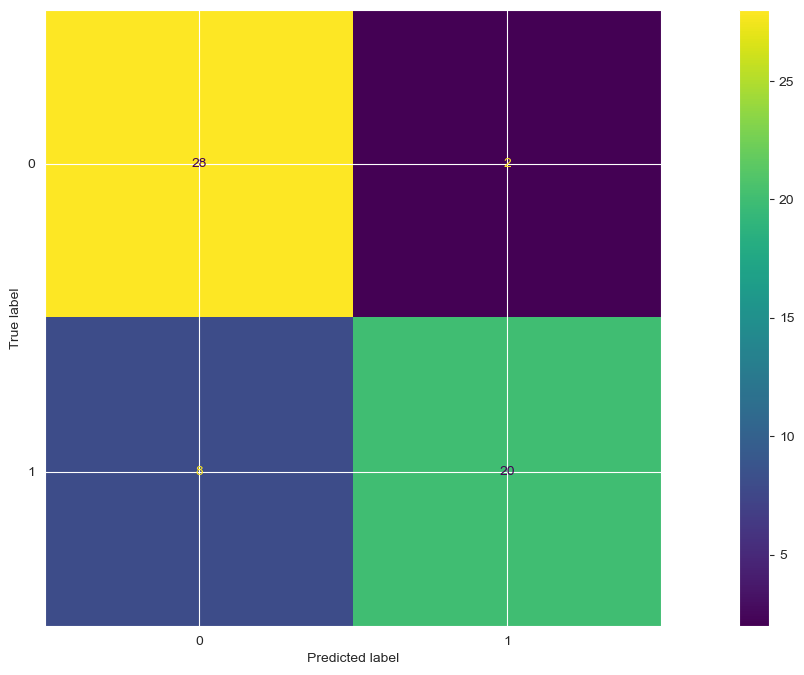

In [60]:
cm = confusion_matrix(y_test, y_pred_kn)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

In [45]:
from sklearn.model_selection import cross_val_predict

y_pred_kn = cross_val_predict(kn_clf, X_test, y_test, cv=10) 
print(classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.91      0.71      0.80        28

    accuracy                           0.83        58
   macro avg       0.84      0.82      0.82        58
weighted avg       0.84      0.83      0.83        58



In [46]:
#DT
dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
#y_pred=pd.DataFrame(dt_clf.predict_proba(X_test))[1].values
y_pred_dt = cross_val_predict(dt_clf, X_test, y_test, cv=10)
score.append(roc_auc_score(y_test,y_pred_dt))
    
np.array(score)

array([1., 1.])

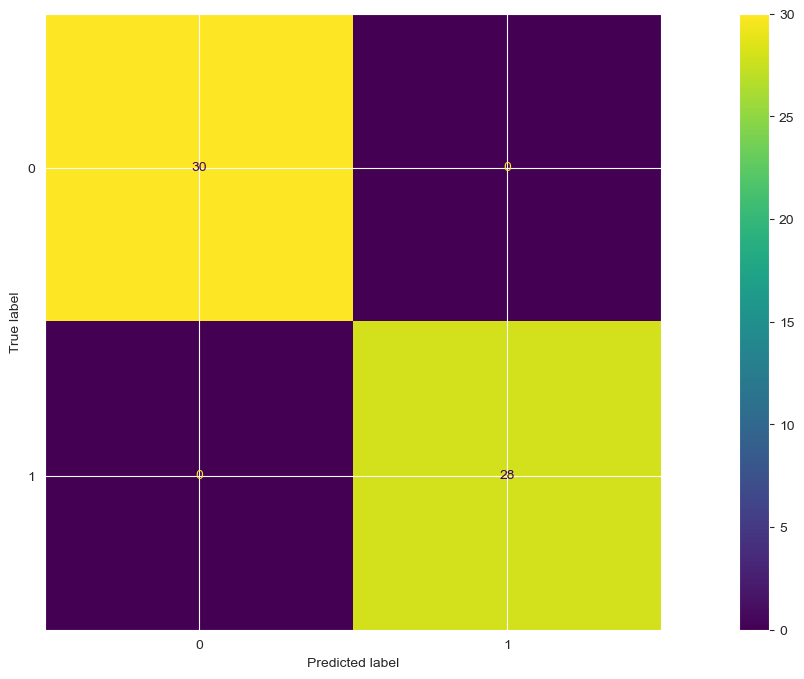

In [61]:
cm = confusion_matrix(y_test, y_pred_dt)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

In [48]:
y_pred_dt = cross_val_predict(dt_clf, X_test, y_test, cv=10)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        28

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [49]:
# RF
rf_clf = RandomForestClassifier()      
rf_clf.fit(X_train,y_train)
#y_pred=pd.DataFrame(rf_clf.predict_proba(X_test))[1].values
y_pred_rf = cross_val_predict(rf_clf, X_test, y_test, cv=10)
score.append(roc_auc_score(y_test,y_pred_rf))
    
np.array(score)

array([1.        , 1.        , 0.98214286])

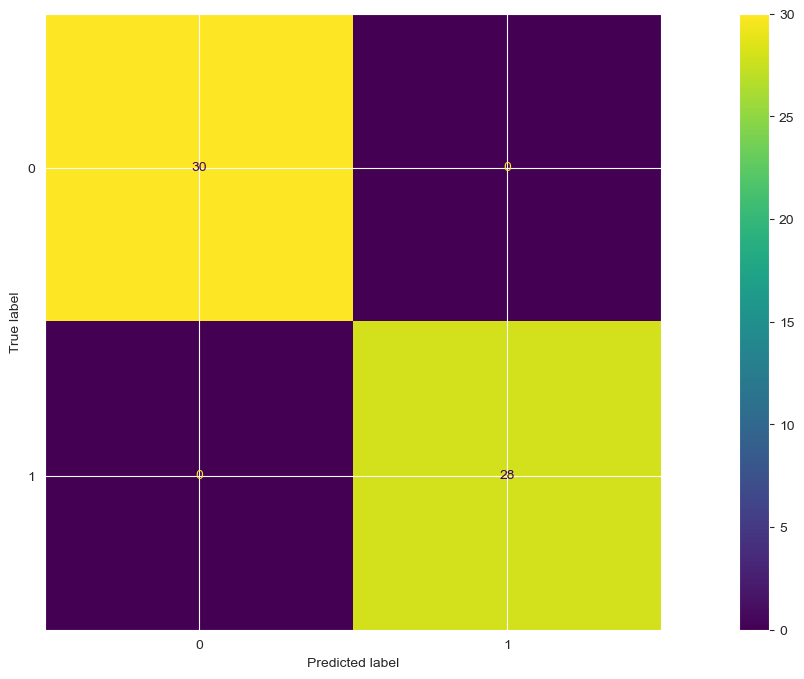

In [62]:
cm = confusion_matrix(y_test, y_pred_rf)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

In [51]:
y_pred_rf = cross_val_predict(rf_clf, X_test, y_test, cv=10)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        28

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [52]:
#LR
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
#y_pred=pd.DataFrame(lr_clf.predict_proba(X_test))[1].values
y_pred_lr = cross_val_predict(lr_clf, X_test, y_test, cv=10) 
score.append(roc_auc_score(y_test,y_pred_lr))
    
np.array(score)

array([1.        , 1.        , 0.98214286, 1.        ])

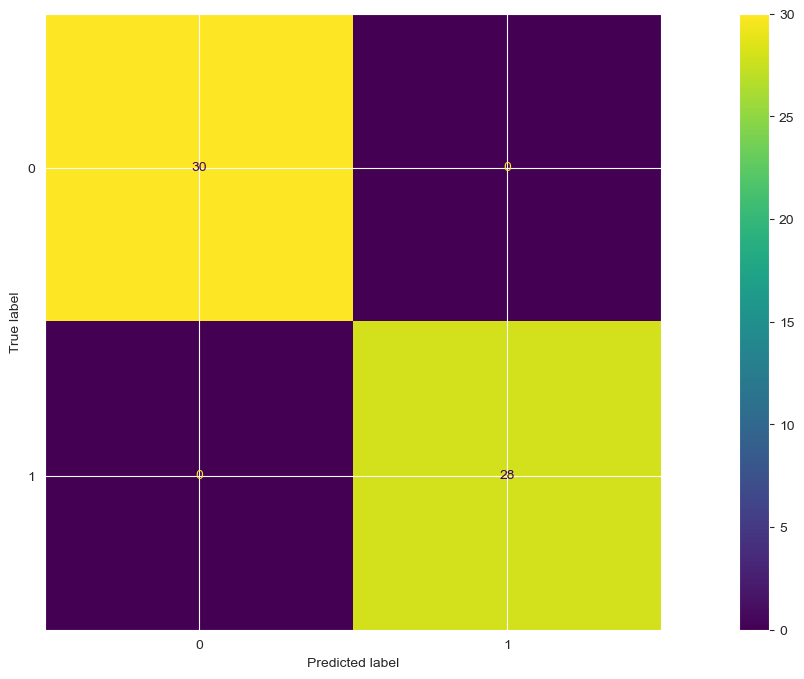

In [63]:
cm = confusion_matrix(y_test, y_pred_lr)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

In [54]:
y_pred_lr = cross_val_predict(lr_clf, X_test, y_test, cv=10) 
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        28

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [55]:
# svc

svc_clf = SVC()
svc_clf.fit(X_train,y_train)
#y_pred = svc_clf.predict(X_test)
y_pred_svc = cross_val_predict(svc_clf, X_test, y_test, cv=10) 
score.append(roc_auc_score(y_test,y_pred_svc))
    
np.array(score)

array([1.        , 1.        , 0.98214286, 1.        , 0.94761905])

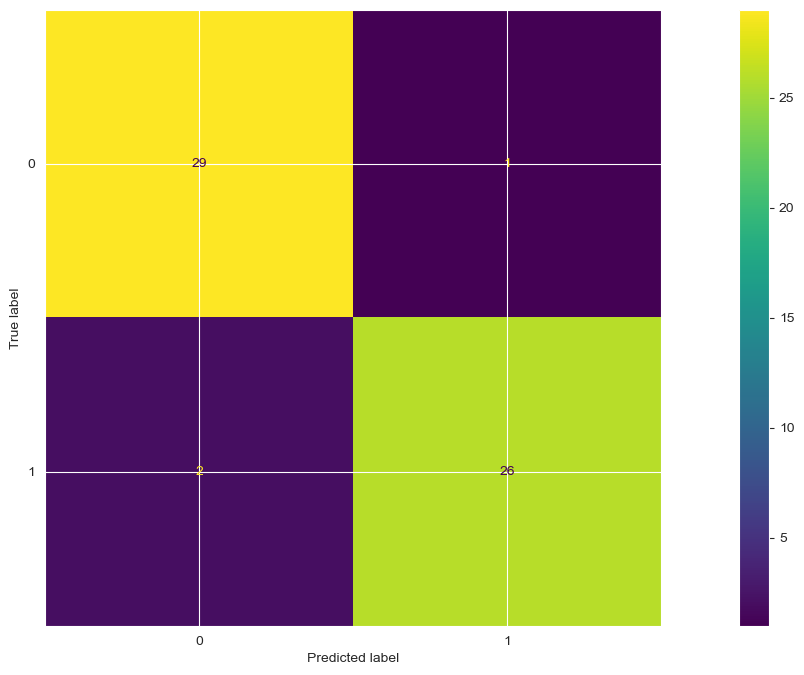

In [64]:
cm = confusion_matrix(y_test, y_pred_svc)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

In [57]:
y_pred_svc = cross_val_predict(svc_clf, X_test, y_test, cv=10) 
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.96      0.93      0.95        28

    accuracy                           0.95        58
   macro avg       0.95      0.95      0.95        58
weighted avg       0.95      0.95      0.95        58



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


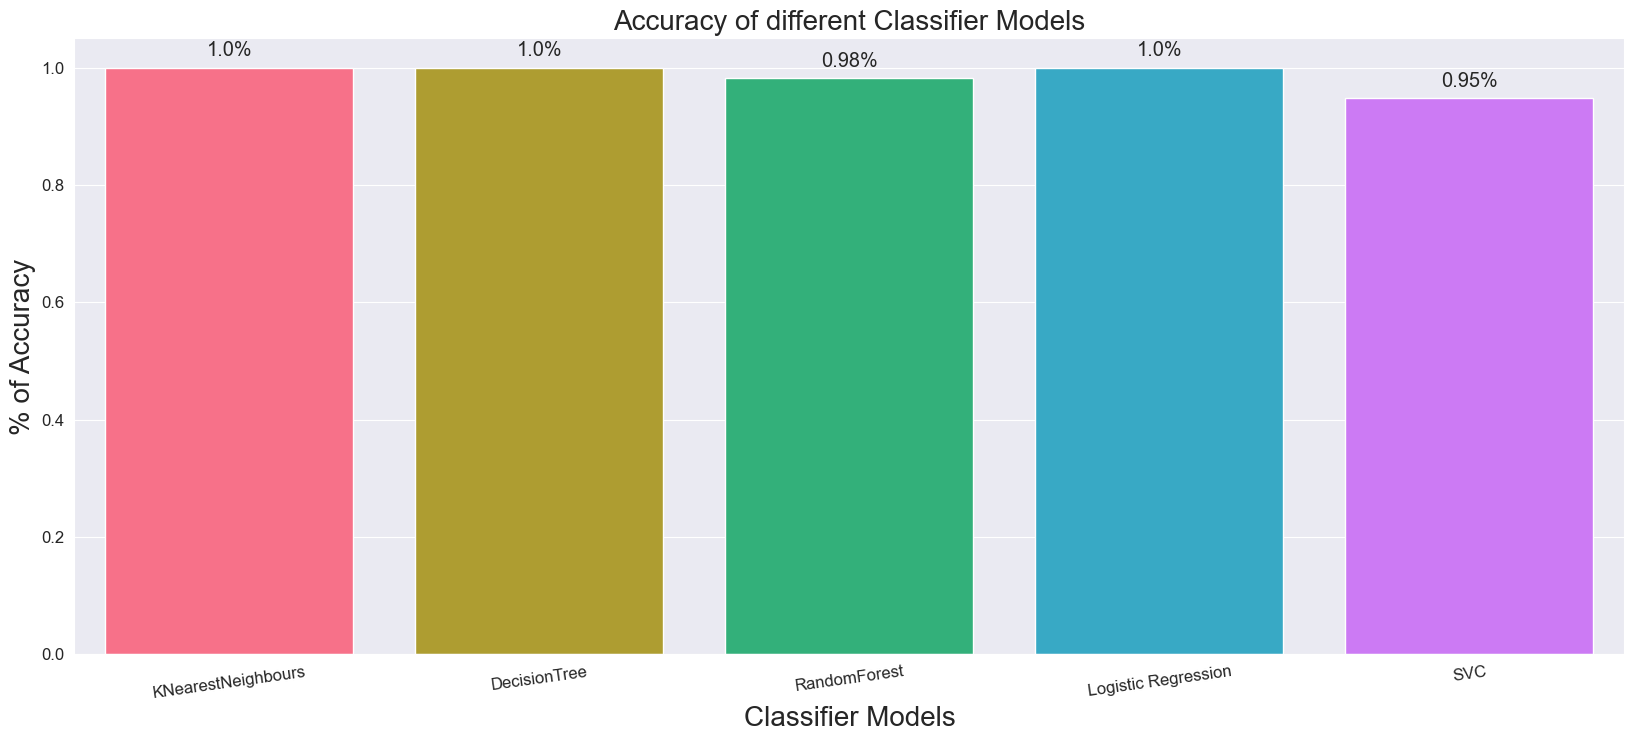

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=score, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [66]:
def print_metrics(y_test, y_pred):
    print("F1 score:", f1_score(y_test, y_pred, average='binary'))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

In [68]:
#KNN
print_metrics(y_test, y_pred_kn)

F1 score: 0.8
ROC AUC: 0.8238095238095239
Accuracy: 0.8275862068965517
Precision: 0.9090909090909091
Recall: 0.7142857142857143
Confusion Matrix: [[28  2]
 [ 8 20]]


In [69]:
##DT
print_metrics(y_test, y_pred_dt)

F1 score: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix: [[30  0]
 [ 0 28]]


In [70]:
##RF
print_metrics(y_test, y_pred_rf)

F1 score: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix: [[30  0]
 [ 0 28]]


In [71]:
##LR
print_metrics(y_test, y_pred_lr)

F1 score: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix: [[30  0]
 [ 0 28]]


In [72]:
##SVC
print_metrics(y_test, y_pred_svc)

F1 score: 0.9454545454545454
ROC AUC: 0.9476190476190476
Accuracy: 0.9482758620689655
Precision: 0.9629629629629629
Recall: 0.9285714285714286
Confusion Matrix: [[29  1]
 [ 2 26]]
